In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("Balaji Fast Food Sales.csv")
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,NaN,Mrs.,Afternoon


In [27]:
df.dtypes

order_id               int64
date                  object
item_name             object
item_type             object
item_price             int64
quantity               int64
transaction_amount     int64
transaction_type      object
received_by           object
time_of_sale          object
dtype: object

In [29]:
df['date'] = df['date'].str.replace('/', '-')
df['date'] = pd.to_datetime(df['date'])

In [31]:
df.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,2022-11-14,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
6,7,2022-05-03,Sugarcane juice,Beverages,25,9,225,Cash,Mr.,Evening
7,8,2022-12-22,Panipuri,Fastfood,20,14,280,Online,Mr.,Night
8,9,2022-06-10,Panipuri,Fastfood,20,1,20,Cash,Mrs.,Morning
9,10,2022-09-16,Panipuri,Fastfood,20,5,100,Online,Mr.,Afternoon


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    893 non-null    object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.3+ KB


In [37]:
df.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [45]:
df.duplicated().sum()

0

In [53]:
# Checking for null values and replace it
df_null = df[df['transaction_type'].isna()]
df['transaction_type'] = df['transaction_type'].fillna("unknown")

In [57]:
df.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,unknown,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,2022-11-14,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
6,7,2022-05-03,Sugarcane juice,Beverages,25,9,225,Cash,Mr.,Evening
7,8,2022-12-22,Panipuri,Fastfood,20,14,280,Online,Mr.,Night
8,9,2022-06-10,Panipuri,Fastfood,20,1,20,Cash,Mrs.,Morning
9,10,2022-09-16,Panipuri,Fastfood,20,5,100,Online,Mr.,Afternoon


In [83]:
# Top performing items
item_quantity = df.groupby(['item_name'])['quantity'].sum().reset_index().sort_values('quantity',ascending = False)


In [85]:
item_quantity

,item_name,quantity
1,Cold coffee,1361
5,Sugarcane juice,1278
3,Panipuri,1226
2,Frankie,1150
4,Sandwich,1097
0,Aalopuri,1044
6,Vadapav,1006


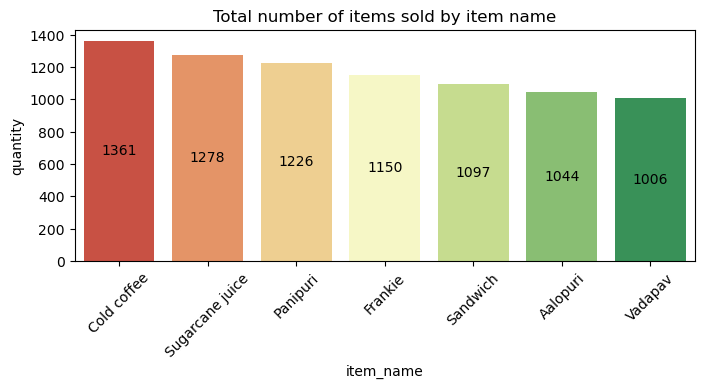

In [109]:
# Total number of items sold by item name

plt.figure(figsize=(8,3))
ax = sns.barplot(item_quantity, x='item_name', y='quantity', palette='RdYlGn')
ax.bar_label(ax.containers[0], label_type='center')
plt.xticks(rotation=45)
plt.title('Total number of items sold by item name')
plt.show()

All items have high sales, but Cold Coffee clearly stands out as the most popular, and Vadapav is the least popular among the items listed.

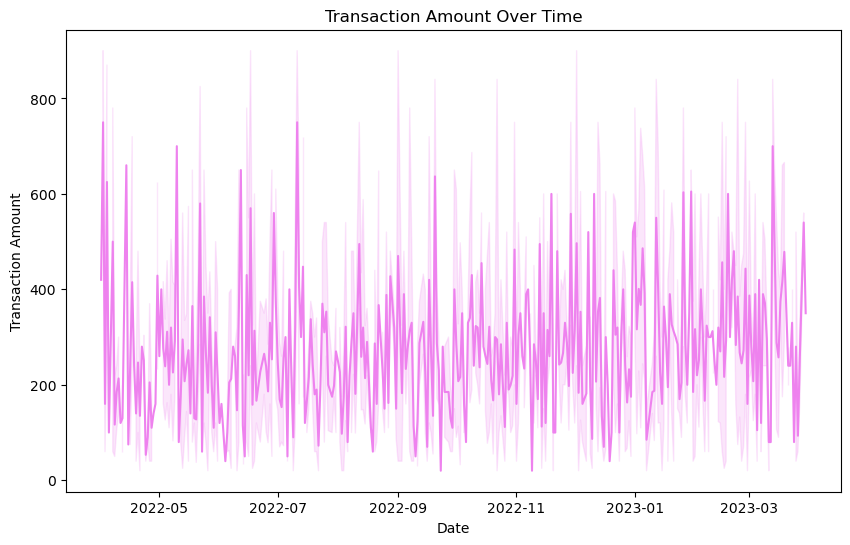

In [99]:
# Transaction amount over time

plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='transaction_amount', data=df,color = 'violet')
plt.title('Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()


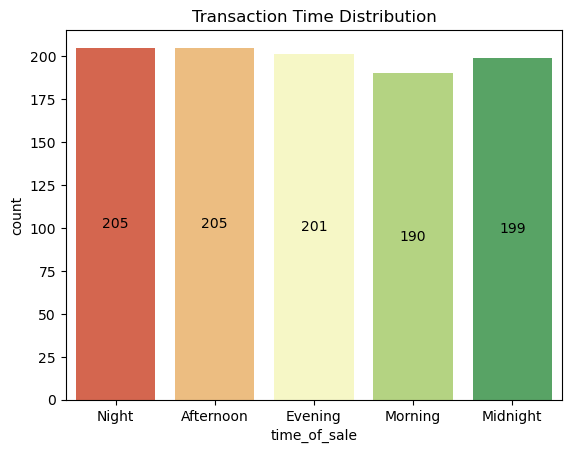

In [105]:
# Transaction time distribution

ax = sns.countplot(df, x='time_of_sale', palette='RdYlGn')
plt.title('Transaction Time Distribution')

ax.bar_label(ax.containers[0],label_type='center')
plt.show()

This distribution suggests that transaction activity is highest during Night and Afternoon, which could be valuable for optimizing business operations or marketing strategies.

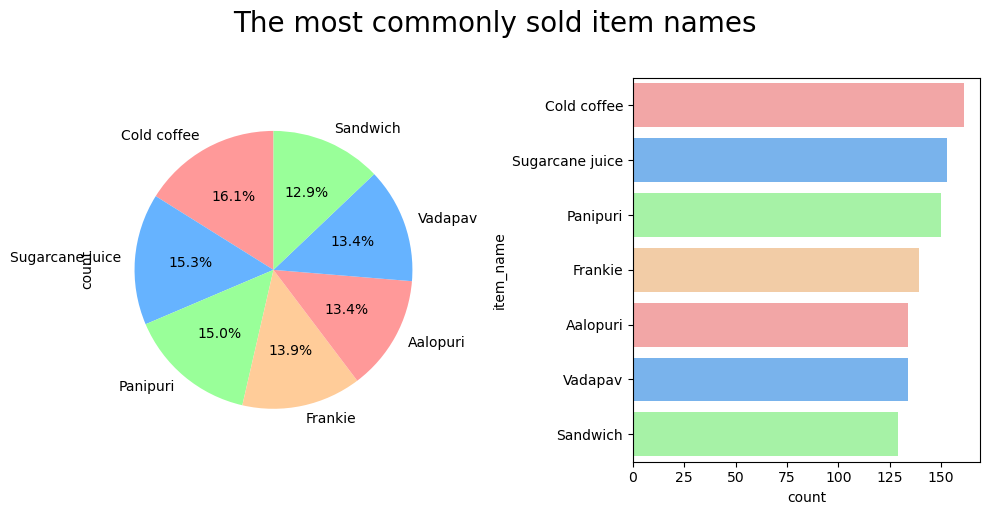

In [117]:
custom_colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']  

plt.figure(figsize=(10, 5))

# First subplot
plt.subplot(1, 2, 1)
df['item_name'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                        colors=custom_colors)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(y='item_name', data=df, palette=custom_colors, 
              order=df['item_name'].value_counts().index)

plt.suptitle('The most commonly sold item names', fontsize=20, y=1.02)

plt.tight_layout()

plt.show()


1) Cold coffee and Sugarcane juice are the top sellers, making up a significant portion of total sales.
2) 
Sandwiches and Panipuri also have notable sales but are slightly lower in comparison
   .
3) 
Frankie and Alupuri have similar sales figures, indicating consistent popularity.

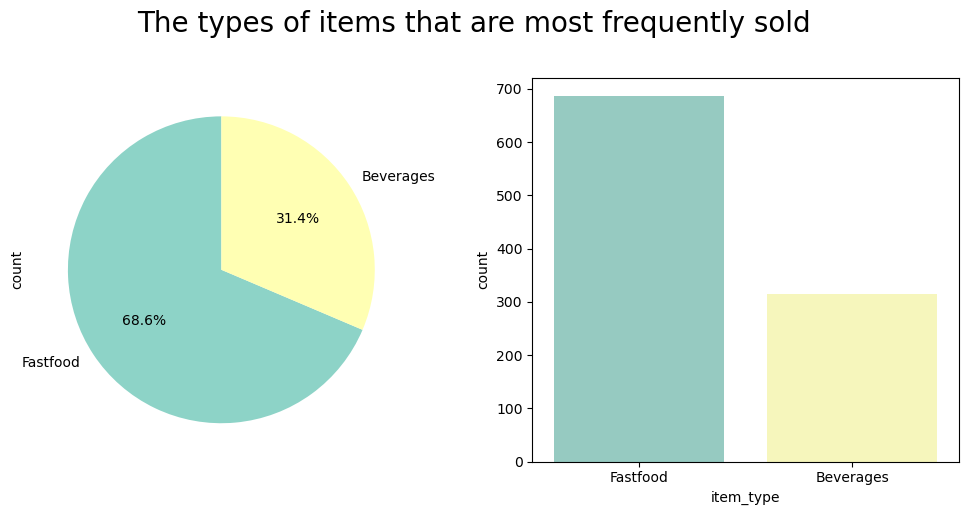

In [119]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['item_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

plt.subplot(1, 2, 2)
sns.countplot(x='item_type', data=df, palette='Set3')

plt.suptitle('The types of items that are most frequently sold', fontsize=20, y=1.02)

plt.tight_layout()

plt.show()

Dominance of Fastfood: Fastfood items are sold more frequently than beverages, making up nearly 70% of total sales.


Significant Difference: The count of fastfood sales is almost three times higher than that of beverages.

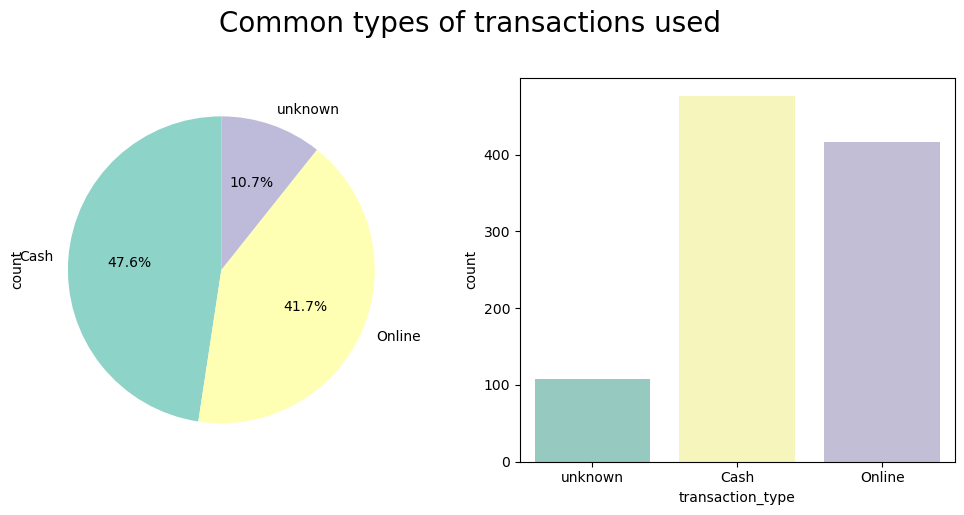

In [121]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['transaction_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

plt.subplot(1, 2, 2)
sns.countplot(x='transaction_type', data=df, palette='Set3')

plt.suptitle('Common types of transactions used', fontsize=20, y=1.02)

plt.tight_layout()

plt.show()

Cash Dominance: Cash transactions are the most common, making up nearly half of all transactions.

Significant Online Transactions: Online transactions also constitute a large portion, indicating a strong preference for digital paymentsy.

In [125]:
# Extract month and year
df['month'] = df['date'].dt.strftime('%b')
df['year'] = df['date'].dt.year
df['month_year'] = df['date'].dt.strftime('%b %Y')

Beverages - MAE: 1511.91, MSE: 2906718.66, R²: 0.32
Fastfood - MAE: 1828.61, MSE: 5278562.67, R²: 0.18


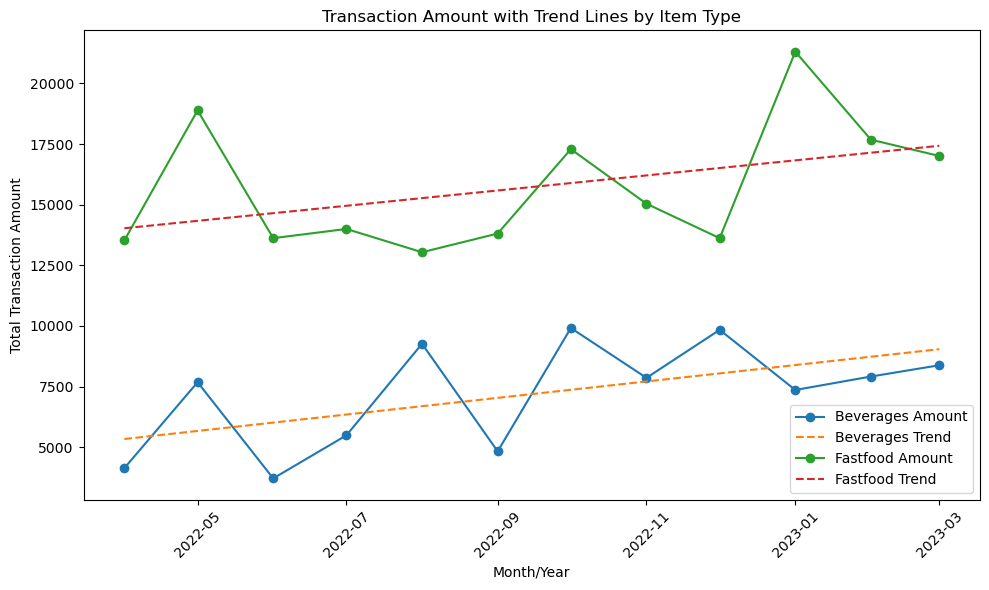

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert 'month_year' to datetime and group transaction amounts by month and item type
df['month_year'] = pd.to_datetime(df['month_year'])
total_transaction_per_month = df.groupby(['month_year', 'item_type'])['transaction_amount'].sum().reset_index()

# Convert 'month_year' to ordinal values
total_transaction_per_month['month_year_ordinal'] = total_transaction_per_month['month_year'].apply(lambda x: x.toordinal())

plt.figure(figsize=(10, 6))

# Perform linear regression and plot trend lines for each item type
for item_type in total_transaction_per_month['item_type'].unique():
    data = total_transaction_per_month[total_transaction_per_month['item_type'] == item_type]
    X = data['month_year_ordinal'].values.reshape(-1, 1)
    y = data['transaction_amount'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    
    # Model evaluation
    mae, mse, r2 = mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred), r2_score(y, y_pred)
    print(f'{item_type} - MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}')
    
    # Plot actual data and trend line
    plt.plot(data['month_year'], data['transaction_amount'], 'o-', label=f'{item_type} Amount')
    plt.plot(data['month_year'], y_pred, '--', label=f'{item_type} Trend')

plt.xlabel('Month/Year')
plt.ylabel('Total Transaction Amount')
plt.title('Transaction Amount with Trend Lines by Item Type')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The R² scores of 0.32 and 0.18 are relatively low, indicating that the model does not explain much of the variance in the transaction amount. This suggests that the linear relationship between the date and transaction amount might not be strong. The MAE, MSE, and RMSE values are quite high, which indicates significant prediction errors. Possible Reasons for Poor Performance:

Non-Linearity: The relationship between month_year and transaction_amount may not be linear. Other patterns or trends might be present that a linear model cannot capture. Missing Features: Other features (e.g., seasonality, promotions, economic factors) might influence the transaction amount and are not included in the model.

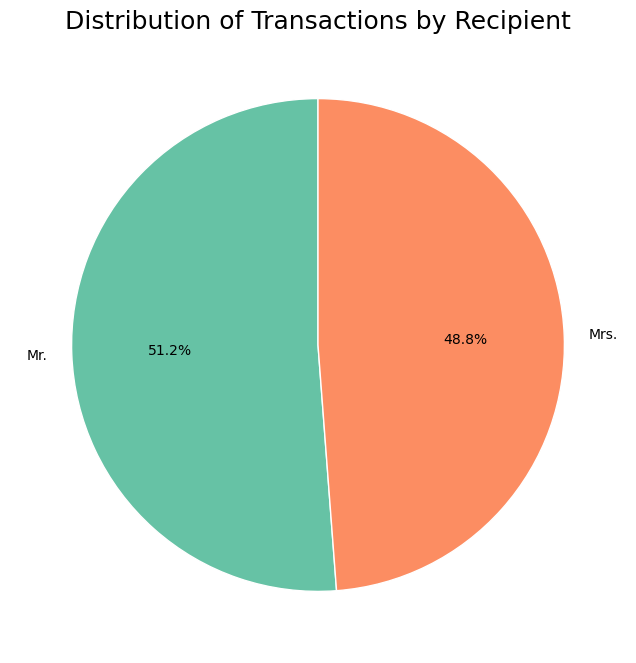

In [135]:
plt.figure(figsize=(8, 8))

received_by_counts = df['received_by'].value_counts()
plt.pie(received_by_counts, labels=received_by_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette('Set2'), wedgeprops={'edgecolor': 'white'})

plt.title('Distribution of Transactions by Recipient', fontsize=18)

plt.show()

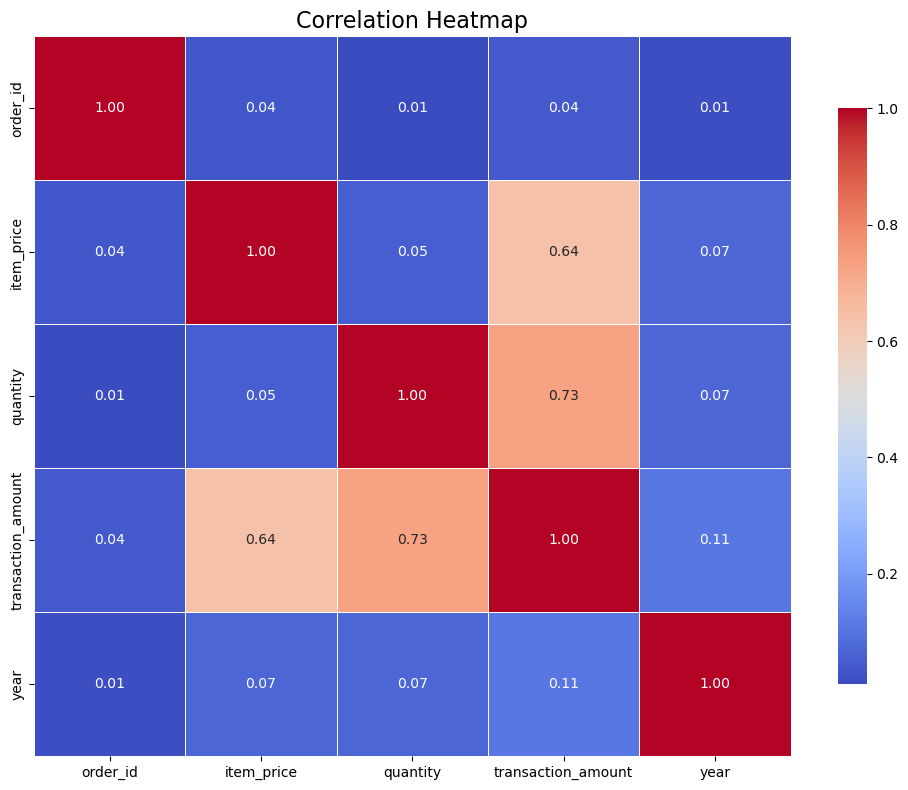

In [141]:
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5, 
            linecolor='white', annot_kws={"size": 10}, fmt='.2f', cbar_kws={'shrink': 0.8})


plt.title('Correlation Heatmap', fontsize=16)

plt.tight_layout()
plt.show()

This heatmap shows the correlation between different numerical columns in the dataset, such as order_id, item_price, quantity, transaction_amount, and year. The colors represent the strength of the relationships between these variables:

Red (closer to 1): Strong positive correlation (as one variable increases, so does the other).
Blue (closer to 0): Weak or no correlation (variables don't significantly affect each other).

Key highlights:
quantity and transaction_amount have a strong positive correlation (0.73), meaning as the quantity increases, the transaction amount also rises.
item_price and transaction_amount are moderately correlated (0.64), indicating higher-priced items contribute to higher transaction amounts.